In [3]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.stats import linregress # type: ignore
import numpy as np # type: ignore
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.read_excel("Thermistor.xlsx")
df.head()

,In_Temp,In_R,De_Temp,De_R
0,30,8.22,86,1.01
1,32,7.64,84,1.02
2,34,7.21,82,1.08
3,36,6.89,80,1.20
4,38,6.70,78,1.30


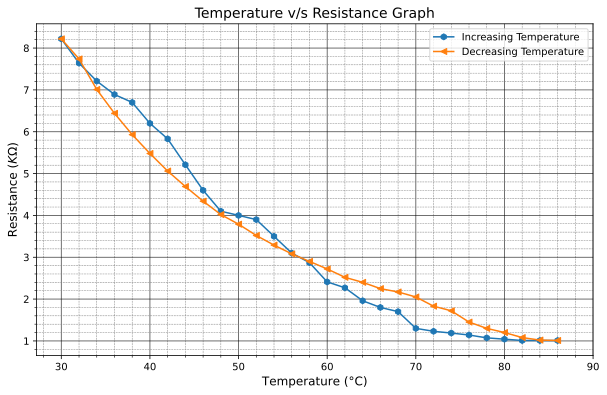

In [10]:
#variation of Temp and Resistance
plt.figure(figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='gray', zorder = 0)
plt.minorticks_on()

plt.plot(df['In_Temp'], df['In_R'], marker = 'h', label = 'Increasing Temperature')
plt.plot(df['De_Temp'], df['De_R'],marker = '<', label = 'Decreasing Temperature')

#labeling
plt.xlabel(r'Temperature ($\degree$C)', fontsize = 12)
plt.ylabel(r'Resistance ($K\Omega$)', fontsize = 12)
plt.title('Temperature v/s Resistance Graph', fontsize = 14)
plt.legend()
plt.xticks([30, 40, 50, 60, 70, 80, 90])
plt.savefig('Temp vs R.png', bbox_inches = 'tight', dpi = 600)
plt.show()

In [13]:
In_df = pd.DataFrame()
In_df['Temp_K'] = df['In_Temp'] + 273
In_df['Inv_K'] = 1 / In_df['Temp_K']
In_df['Ln_inv_R'] =  np.log(1/(df['In_R']*1000))
In_df.head()

,Temp_K,Inv_K,Ln_inv_R
0,303,0.003300,-9.014325
1,305,0.003279,-8.941153
2,307,0.003257,-8.883224
3,309,0.003236,-8.837826
4,311,0.003215,-8.809863


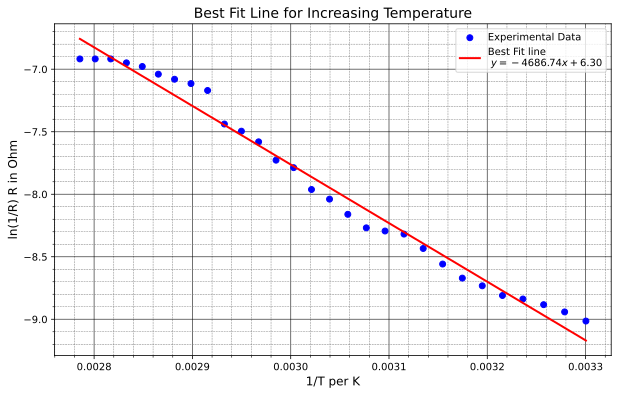

In [27]:
plt.figure(figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='gray', zorder = 0)
plt.minorticks_on()

plt.scatter(In_df['Inv_K'], In_df['Ln_inv_R'], label = 'Experimental Data', zorder = 3, c = 'blue')
slope, intercept, r, p, se = linregress(In_df['Inv_K'], In_df['Ln_inv_R'])
plt.plot(In_df['Inv_K'], slope * In_df['Inv_K'] + intercept, color = 'red', lw = 2, 
         label = f"Best Fit line \n $y = {slope:.2f} x + {intercept:.2f}$", zorder = 4)


plt.xlabel(r'1/T per K', fontsize = 12)
plt.ylabel('ln(1/R) R in Ohm', fontsize = 12)
plt.title('Best Fit Line for Increasing Temperature', fontsize = 14)
plt.legend()
plt.savefig('Best fit increasing.png', bbox_inches = 'tight', dpi = 600)
plt.show()

In [28]:
De_df = pd.DataFrame()
De_df['Temp_K'] = df['De_Temp'] + 273
De_df['Inv_K'] = 1 / De_df['Temp_K']
De_df['Ln_inv_R'] =  np.log(1/(df['De_R']*1000))
In_df.head()

,Temp_K,Inv_K,Ln_inv_R
0,303,0.003300,-9.014325
1,305,0.003279,-8.941153
2,307,0.003257,-8.883224
3,309,0.003236,-8.837826
4,311,0.003215,-8.809863


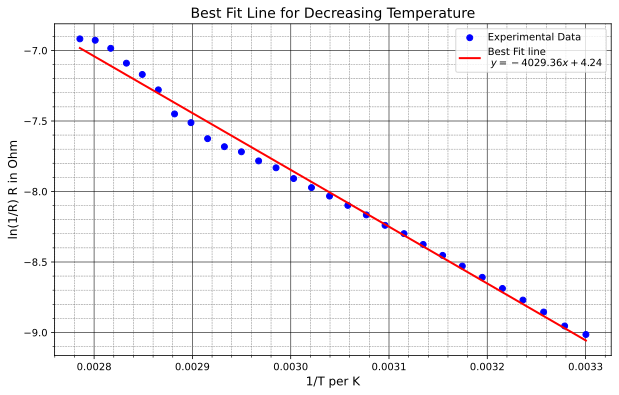

In [30]:
plt.figure(figsize = (10, 6))
plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='gray', zorder = 0)
plt.minorticks_on()

plt.scatter(De_df['Inv_K'], De_df['Ln_inv_R'], label = 'Experimental Data', zorder = 3, c = 'blue')
slope, intercept, r, p, se = linregress(De_df['Inv_K'], De_df['Ln_inv_R'])
plt.plot(De_df['Inv_K'], slope * De_df['Inv_K'] + intercept, color = 'red', lw = 2,
         label = f'Best Fit line \n $y = {slope:.2f} x + {intercept:.2f}$', zorder = 4)




plt.xlabel(r'1/T per K', fontsize = 12)
plt.ylabel('ln(1/R) R in Ohm', fontsize = 12)
plt.title('Best Fit Line for Decreasing Temperature', fontsize = 14)
plt.legend()

plt.savefig('Best fit decreasing.png', bbox_inches = 'tight', dpi = 600)
plt.show()